In [1]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mitchellkrieger/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv('./judge-1377884607_tweet_product_company.csv',encoding = "ISO-8859-1")
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [4]:
df.emotion_in_tweet_is_directed_at.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9088    False
9089     True
9090     True
9091     True
9092     True
Name: emotion_in_tweet_is_directed_at, Length: 9093, dtype: bool

In [5]:
apple = ['iPad', 'Apple', 'iPad or iPhone App', 'iPhone',
       'Other Apple product or service']

conditions = [df.emotion_in_tweet_is_directed_at == i for i in apple]

choices = [1 for i in range(len(conditions))]

conditions.append(df.emotion_in_tweet_is_directed_at.isnull())
choices.append(2)


df['apple_or_google'] = np.select(conditions,choices)
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,apple_or_google
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,1
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,1
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,0


In [42]:
df.loc[df.apple_or_google==2].tweet_text.values

array(['@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd',
       'Holler Gram for iPad on the iTunes App Store -  http://t.co/kfN3f5Q (via @marc_is_ken) #sxsw',
       'Attn: All  #SXSW frineds, @mention Register for #GDGTLive  and see Cobra iRadar for Android. {link}',
       ...,
       "Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",
       'Some Verizon iPhone customers complained their time fell back an hour this weekend.  Of course they were the New Yorkers who attended #SXSW.',
       '\x8cÏ¡\x8eÏà\x8aü_\x8b\x81Ê\x8b\x81Î\x8b\x81Ò\x8b\x81£\x8b\x81Á\x8bââ\x8b\x81_\x8b\x81£\x8b\x81\x8f\x8bâ_\x8bÛâRT @mention Google Tests \x89ÛÏCheck-in Offers\x89Û\x9d At #SXSW {link}'],
      dtype=object)

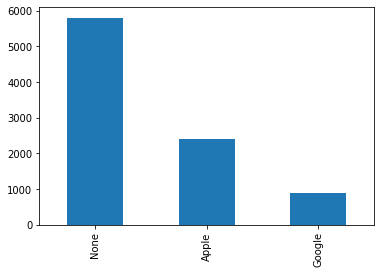

In [7]:
ax = df.apple_or_google.value_counts().plot(kind='bar')
ax.set_xticklabels(['None','Apple','Google']);

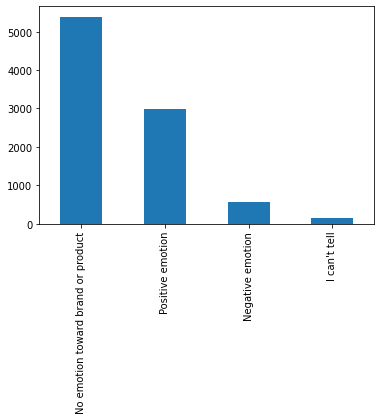

In [8]:
df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts().plot(kind='bar')

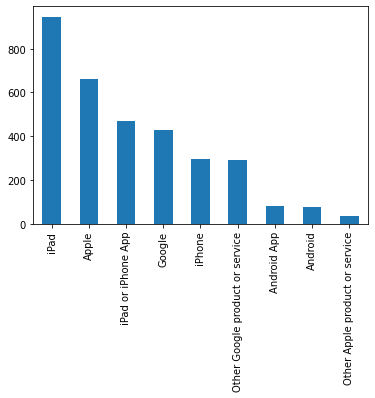

In [9]:
df.emotion_in_tweet_is_directed_at.value_counts().plot(kind='bar')

In [10]:
type(df.tweet_text[0])

str

In [11]:
import re
clean = df.tweet_text.str.lower()
clean.replace("[.,\"'?!:()\-$%<>~;&#@]","", regex=True,inplace=True)
clean.replace("&amp","",regex=True,inplace=True)
clean.replace("\B{link}\B","",regex=True,inplace=True)
clean.replace('(rt)','',regex=True,inplace=True)
clean.replace('\s+',' ',regex=True,inplace=True)
df['clean'] = clean
df.dropna(subset=['clean'], inplace=True)

In [12]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,apple_or_google,clean
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,1,wesley83 i have a 3g iphone after 3 hrs tweeti...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,1,jessedee know about fludapp awesome ipad/iphon...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,1,swonderlin can not wait for ipad 2 also they s...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,1,sxsw i hope this years festival isnt as crashy...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,0,sxtxstate great stuff on fri sxsw marissa maye...


In [13]:
from nltk.corpus import stopwords
stop_words = set(re.sub("'","", word) for word in stopwords.words('english'))

In [14]:
stop_words
df['tokens'] = df.clean.apply(lambda s:nltk.word_tokenize(str(s)))

In [15]:
df.tokens = df.tokens.apply(lambda tokens:[word for word in tokens if word not in stop_words])

In [16]:
words = pd.DataFrame(df.tokens.values.tolist()).values.reshape(9092*26,)
words = words[words!=None]

In [17]:
words

array(['wesley83', '3g', 'iphone', ..., '\x89ûïcheckin',
       'offers\x89û\x9d', 'sxsw'], dtype=object)

In [18]:
from nltk.probability import FreqDist

FreqDist(words).most_common(20)

[('sxsw', 9429),
 ('mention', 6904),
 ('ipad', 2406),
 ('google', 2337),
 ('apple', 2143),
 ('iphone', 1512),
 ('store', 1467),
 ('new', 1089),
 ('2', 1064),
 ('austin', 954),
 ('app', 810),
 ('amp', 722),
 ('launch', 650),
 ('social', 641),
 ('circles', 622),
 ('popup', 599),
 ('today', 564),
 ('android', 563),
 ('network', 464),
 ('ipad2', 449)]

In [19]:
sentiment = SentimentIntensityAnalyzer()

In [44]:
df['vader'] = df['clean'].apply(lambda tweet:sentiment.polarity_scores(tweet))
df['comp'] = df['vader'].apply(lambda vader:vader['compound'])
df['vsentiment'] = df['comp'].apply(lambda x: 1 if x >= .15 else (-1 if x <= -.15 else 0))

In [45]:
df.vader[1]

{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'compound': 0.91}

In [46]:
df[['tweet_text','comp']].iloc[3].values

array(["@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw",
       0.7269], dtype=object)

In [47]:
df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [48]:
conditions =[
    df.is_there_an_emotion_directed_at_a_brand_or_product == 'Negative emotion',
    df.is_there_an_emotion_directed_at_a_brand_or_product == 'Positive emotion',
    df.is_there_an_emotion_directed_at_a_brand_or_product == ("I can't tell" or 'No emotion toward brand or product')
]

choices = [-1,1,0]

df['train_sentiment'] = np.select(conditions,choices)

In [53]:
(df.vsentiment == df.train_sentiment).sum()/len(df)

0.538825340959085

In [63]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[ 206  203  161]
 [ 656 3057 1831]
 [ 277 1065 1636]]


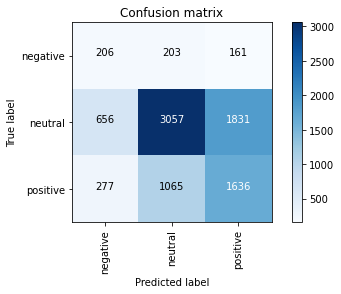

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion = confusion_matrix(df.train_sentiment,df.vsentiment)

plot_confusion_matrix(confusion,['negative','neutral','positive'])

In [61]:
sorted([-1,1,0])

[-1, 0, 1]